In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
from keras.utils import normalize

In [12]:
# Function to load images from directories
def load_images_from_folder(folder, label, size=(150, 150)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


In [16]:
# Load and preprocess data
x_train_fake, y_train_fake = load_images_from_folder('D:/deeplearning_je/train/fake', 0)
x_train_real, y_train_real = load_images_from_folder('D:/deeplearning_je/train/real', 1)
x_train = np.concatenate((x_train_fake, x_train_real), axis=0)
y_train = np.concatenate((y_train_fake, y_train_real), axis=0)

In [13]:
x_test_fake, y_test_fake = load_images_from_folder('D:/deeplearning_je/test/fake', 0)
x_test_real, y_test_real = load_images_from_folder('D:/deeplearning_je/test/real', 1)
x_test = np.concatenate((x_test_fake, x_test_real), axis=0)
y_test = np.concatenate((y_test_fake, y_test_real), axis=0)

In [17]:
x_val_fake, y_val_fake = load_images_from_folder('D:/deeplearning_je/validation/fake', 0)
x_val_real, y_val_real = load_images_from_folder('D:/deeplearning_je/validation/real', 1)
x_val = np.concatenate((x_val_fake, x_val_real), axis=0)
y_val = np.concatenate((y_val_fake, y_val_real), axis=0)


In [18]:
# Normalize images
x_train =x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

In [19]:
# Define the model
INPUT_SHAPE = (x_train.shape[1], x_train.shape[2], 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))  # Binary classification
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',  
              metrics=['accuracy'])

c:\Users\abi00\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Train the model
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    verbose=1,
                    epochs=100,  # Adjust epochs as needed
                    validation_data=(x_val, y_val),
                    shuffle=False)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9091 - loss: 7.1844 - val_accuracy: 0.7050 - val_loss: 3.7483
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.6292 - loss: 0.7667 - val_accuracy: 0.7050 - val_loss: 0.6136
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.7076 - loss: 0.5494 - val_accuracy: 0.7050 - val_loss: 0.6525
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.7246 - loss: 0.6246 - val_accuracy: 0.7050 - val_loss: 0.6383
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.8112 - loss: 0.5932 - val_accuracy: 0.7050 - val_loss: 0.6208
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.8463 - loss: 0.5638 - val_accuracy: 0.7050 - val_loss: 0.6195
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.8787 - loss: 0.5426 - val_accuracy: 0.7050 - val_loss: 0.6128
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.8858 - loss: 0.5304 - val_accu

In [22]:
# Save the model
model.save('models/fake_currency_model_100epochs.h5')

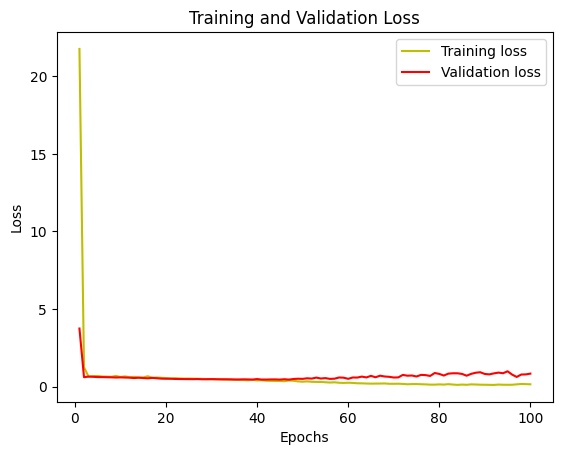

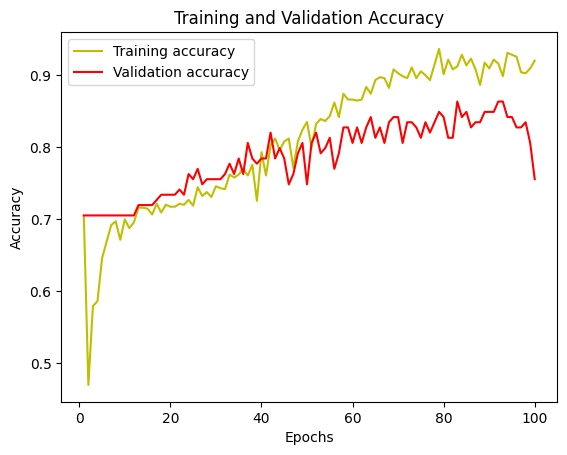

In [23]:
# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluate model on the test set
_, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7711 - loss: 0.7148
Test Accuracy: 76.60%


In [25]:
# threshold for prediction
mythreshold = 0.5  # Default threshold for binary classification

# Confusion matrix
y_pred = (model.predict(x_test) >= mythreshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Confusion Matrix:
 [[25  8]
 [ 3 11]]
